# Pymaceuticals Inc.
---

### Analysis

The analysis of the data presented in this pymaceuticals plotting project gives valuable insights into the effectiveness and characteristics of the Capomulin, Ramicane, Infubinol, and Ceftamin treatment regimens on mice with tumors. Initial data cleaning involved combining mouse metadata with study results, identifying and addressing duplicates, and extracting the final tumor volume for each mouse across the specified treatment regimens. Summary statistics were then calculated, providing a detailed overview of the mean, median, variance, standard deviation, and standard error of the mean (SEM) for the tumor volume in each regimen. The potential outliers were also identified, aiding in the detection of any unusual data points that might impact the analysis.

Furthermore, individual box plots were generated for each treatment regimen to visually depict the distribution of tumor volumes and highlight potential outliers. The analysis revealed that the Capomulin and Ramicane regimens generally led to lower tumor volumes compared to Infubinol and Ceftamin. Additionally, a line plot was generated to show the fluctuation of tumor volume over time for a specific mouse treated with Capomulin, providing a sound representation of treatment effectiveness.

Next, relationship between mouse weight and average observed tumor volume within the Capomulin regimen was addressed and engaged. A scatter plot, correlation coefficient calculation, and linear regression model were employed to show a positive correlation between mouse weight and tumor volume. The linear regression line further defined the upward trend, with the slope indicating the average increase in tumor volume for each additional gram of weight. Statistical significance was confirmed by a low p-value, validating the reliability of the correlation.

In conclusion, this comprehensive analysis not only offers a detailed understanding of tumor volume dynamics across different treatment regimens but also sheds light on the influence of mouse weight on treatment outcomes. Such insights contribute to a more nuanced interpretation of the data, facilitating informed decisions in preclinical studies and potentially informing future clinical applications.
 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = len(combined_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mice)]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(cleaned_df['Mouse ID'].unique())
new_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Assemble the resulting series into a single summary DataFrame

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

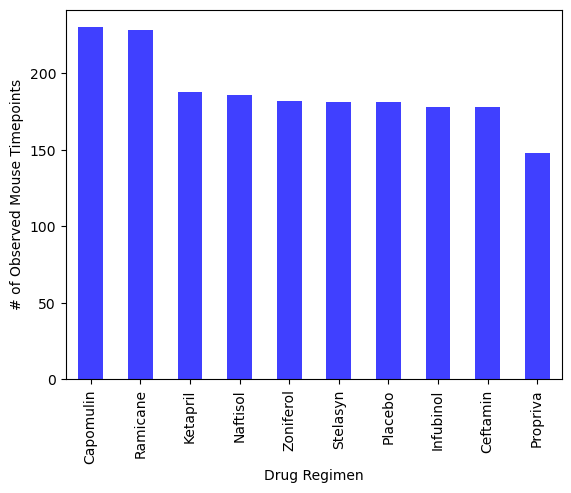

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_mouse_timepoints = cleaned_df['Drug Regimen'].value_counts()

observed_mouse_timepoints.plot(kind='bar', color='blue', alpha=0.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

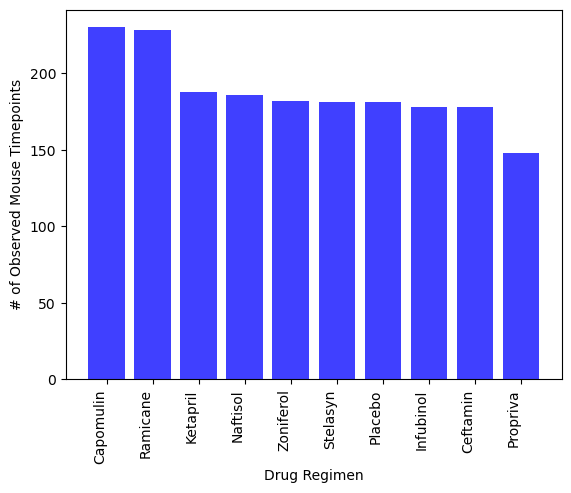

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = observed_mouse_timepoints.index
rows = observed_mouse_timepoints.values
plt.bar(timepoints, rows, color='blue', alpha=0.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.show()

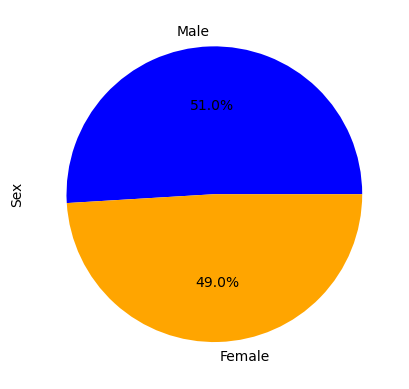

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mvf_dist = cleaned_df['Sex'].value_counts()

mvf_dist.plot(kind='pie', labels = mvf_dist.index, autopct='%1.1f%%', colors=['blue', 'orange'])

plt.ylabel('Sex')

plt.show()

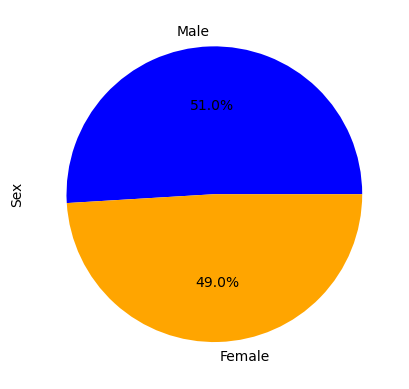

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mvf_dist, labels=mvf_dist.index, autopct='%1.1f%%', colors=['blue', 'orange'])

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_regimens = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = selected_regimens.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Find potential outliers
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {potential_outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


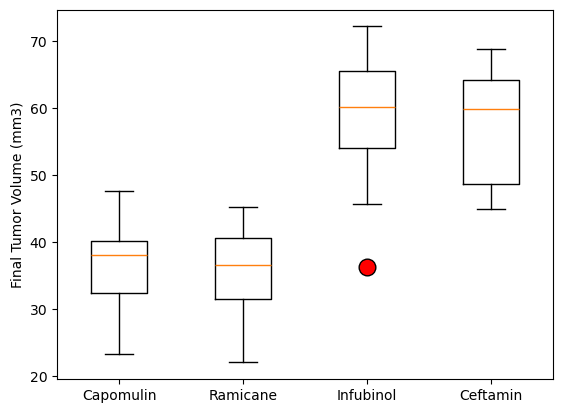

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize = 12))

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

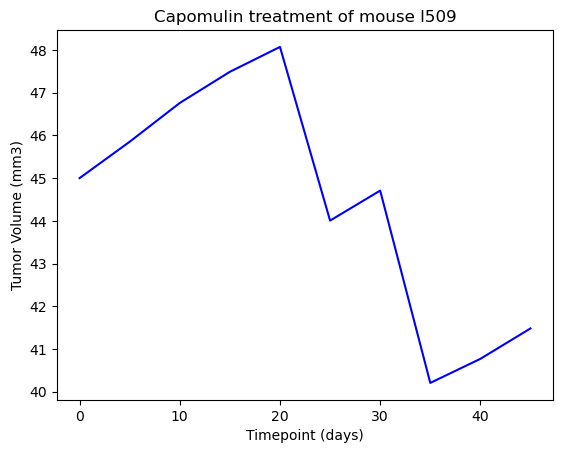

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace 'YourMouseID' with the actual Mouse ID

mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='blue')

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

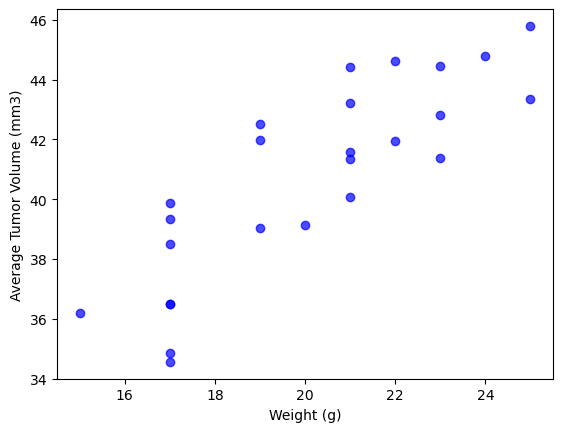

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_data = pd.merge(average_tumor_vol, mouse_metadata)

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


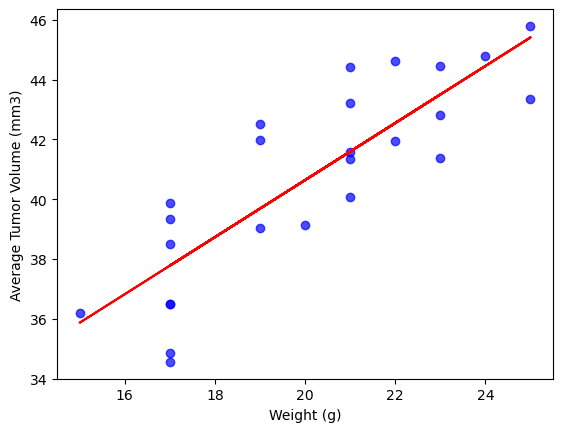

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Add the linear regression line to the plot
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient.round(2)}')

# Show the plot
plt.show()
